In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from IPython.core.debugger import set_trace

# Gunshot Data

In [2]:
gunshot_frame = pd.read_csv("gunshot.csv")

In [3]:
gunshot_frame.head()

,Unnamed: 0,Intent,Gender,Age,Race,Deaths,Population,Rate
0,1,None selected,None selected,None selected,None selected,33599,316299978,10.6
1,2,None selected,None selected,None selected,White,22079,197369634,11.2
2,3,None selected,None selected,None selected,Black,7765,38896382,20.0
3,4,None selected,None selected,None selected,Hispanic,3007,54049078,5.6
4,5,None selected,None selected,None selected,Asian/Pacific Islander,442,16315561,2.7


In [4]:
gunshot_frame.Gender.unique()

array(['None selected', 'Female', 'Male'], dtype=object)

In [5]:
gunshot_frame.rename(columns={"Rate":"RRRRRate"}).head(1)

,Unnamed: 0,Intent,Gender,Age,Race,Deaths,Population,RRRRRate
0,1,None selected,None selected,None selected,None selected,33599,316299978,10.6


In [6]:
gunshot_frame.Age.unique()

array(['None selected', 'Under 15', '15 - 34', '35 - 64', '65+', '5'], dtype=object)

In [7]:
young_male_deaths = gunshot_frame.query("Gender == 'Male' & Age in ['Under 15', '15 - 34']")
young_male_deaths.head()

,Unnamed: 0,Intent,Gender,Age,Race,Deaths,Population,Rate
78,79,None selected,Male,Under 15,None selected,303,31249189,1.0
79,80,None selected,Male,Under 15,White,179,16182922,1.1
80,81,None selected,Male,Under 15,Black,77,4228176,1.8
81,82,None selected,Male,Under 15,Hispanic,39,7664425,0.5
82,83,None selected,Male,Under 15,Asian/Pacific Islander,5,1431715,0.3


In [8]:
type(gunshot_frame.groupby("Age").groups)

dict

In [9]:
gunshot_frame.groupby("Age").agg({"Deaths":sum})

,Deaths
Age,
15 - 34,101781
35 - 64,118993
5,42
65+,44551
None selected,268795
Under 15,3418


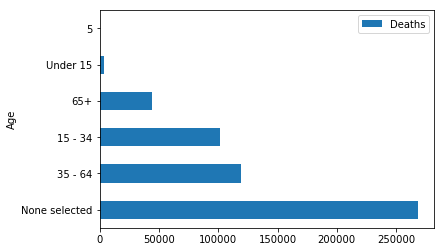

In [10]:
gunshot_frame.groupby("Age").agg({"Deaths":sum}).sort_values(by="Deaths", ascending=False).plot(kind="barh")

In [11]:
string_index = gunshot_frame["Age"].str.contains(" - 34")
gunshot_frame[string_index].head()

,Unnamed: 0,Intent,Gender,Age,Race,Deaths,Population,Rate
12,13,None selected,None selected,15 - 34,None selected,12723,86611149,14.7
13,14,None selected,None selected,15 - 34,White,5244,48773131,10.8
14,15,None selected,None selected,15 - 34,Black,5297,11893789,44.5
15,16,None selected,None selected,15 - 34,Hispanic,1822,17960261,10.1
16,17,None selected,None selected,15 - 34,Asian/Pacific Islander,200,4950398,4.0


In [12]:
gunshot_frame["Intent"].unique()

array(['None selected', 'Suicide', 'Homicide', 'Accident', 'Unknown'], dtype=object)

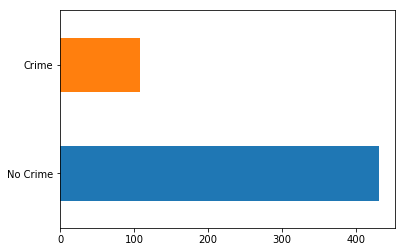

In [13]:
crime = gunshot_frame["Intent"].apply(lambda x : "Crime" if x=="Homicide" else "No Crime")
crime.value_counts().plot(kind="barh")

In [14]:
gunshot_frame.groupby("Race").sum()

,Unnamed: 0,Deaths,Population,Rate
Race,,,,
Asian/Pacific Islander,24480,3535,326311220,72.100000
Black,24300,62119,777927635,inf
Hispanic,24390,24056,1080981570,154.700000
None selected,24120,268794,6325999570,inf
Other,24570,2444,193386475,99.300000
White,24210,176632,3947392680,inf


In [15]:
gunshot_frame.groupby(["Age", "Race", "Intent"]).size().unstack().loc[("15 - 34", "Black"), ("Accident",)]

Intent
Accident    3
Name: (15 - 34, Black), dtype: int64

# Flight data

In [16]:
flight_data = pd.read_csv("flight_data.csv")

In [17]:
flight_data.shape

(201664, 14)

In [18]:
flight_data = flight_data.fillna(np.nan)
flight_data.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,2015-01-02 00:00:00,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0
1,2015-01-03 00:00:00,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0
2,2015-01-04 00:00:00,AA,1.0,JFK,LAX,-12.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,385.0
3,2015-01-05 00:00:00,AA,1.0,JFK,LAX,-8.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,389.0
4,2015-01-06 00:00:00,AA,1.0,JFK,LAX,25.0,0.0,2475.0,0.0,0.0,0.0,25.0,0.0,424.0


In [19]:
flight_data["flight_date"].dtype

dtype('O')

In [20]:
flight_data["flight_date"]= pd.to_datetime(flight_data["flight_date"])
flight_data.head(2)

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
0,2015-01-02,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0
1,2015-01-03,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0


In [21]:
flight_data["carrier_delay"].dtype

dtype('float64')

In [22]:
flight_data.sort_values(by="arr_delay", ascending= False)[:2]

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time
11073,2015-01-11,AA,1595.0,AUS,DFW,1444.0,0.0,190.0,1444.0,0.0,0.0,0.0,0.0,59.0
10214,2015-01-13,AA,1487.0,OMA,DFW,1392.0,0.0,583.0,1392.0,0.0,0.0,0.0,0.0,117.0


In [23]:
flight_data["delayed"]=flight_data.eval("arr_delay>0")

In [24]:
flight_data["delayed"].value_counts()

False    103037
True      98627
Name: delayed, dtype: int64

In [25]:
carrier_delayed = flight_data.groupby(["unique_carrier", "delayed"])
carrier_delayed.size().head()

unique_carrier  delayed
AA              False      8912
                True       9841
AS              False      3527
                True       2104
B6              False      4832
dtype: int64

In [26]:
carrier_delayed.size().unstack()

delayed,False,True
unique_carrier,,
AA,8912,9841
AS,3527,2104
B6,4832,4401
DL,17719,9803
EV,10596,11371
F9,1103,1848
HA,1351,1354
MQ,4692,8060
NK,1550,2133


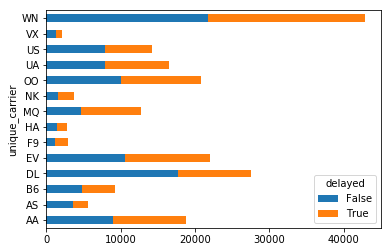

In [27]:
carrier_delayed.size().unstack().plot(kind="barh", stacked=True)

In [28]:
len(flight_data.query("arr_delay>20"))

48679

In [29]:
flight_data.pivot_table(index="unique_carrier", values="arr_delay", aggfunc="mean")

,arr_delay
unique_carrier,
AA,15.616299
AS,1.731951
B6,13.576129
DL,4.118949
EV,18.358520
F9,28.836953
HA,6.458937
MQ,35.627406
NK,22.779670


In [30]:
flight_data.pivot_table(columns="flight_date", aggfunc="mean")

flight_date,2015-01-02 00:00:00,2015-01-03 00:00:00,2015-01-04 00:00:00,2015-01-05 00:00:00,2015-01-06 00:00:00,2015-01-07 00:00:00,2015-01-08 00:00:00,2015-01-09 00:00:00,2015-01-10 00:00:00,2015-01-11 00:00:00,2015-01-12 00:00:00,2015-01-13 00:00:00,2015-01-14 00:00:00
actual_elapsed_time,141.688442,145.950033,145.111664,140.607814,137.699987,136.297427,138.249851,137.045859,137.876833,138.712463,139.096045,134.649796,133.110117
arr_delay,9.838904,25.461860,31.975011,18.811310,21.299274,11.955429,13.316482,12.255611,1.922475,10.187042,18.563998,3.162599,-0.817102
cancelled,0.015352,0.021446,0.026480,0.026287,0.025792,0.019459,0.050784,0.029298,0.015392,0.023993,0.027442,0.012978,0.011469
carrier_delay,16.668783,18.023806,18.213584,17.986333,16.751224,15.317566,19.767890,18.768564,25.002997,17.142741,15.063235,18.112939,22.049189
delayed,0.500209,0.648050,0.679244,0.548707,0.544695,0.483912,0.419639,0.468328,0.345917,0.436424,0.551360,0.382279,0.302835
distance,839.785915,848.749320,838.077666,820.224801,784.111329,785.939182,792.963770,793.554910,830.779650,809.407279,791.471614,779.262121,782.294072
flight_num,2284.698047,2287.225541,2268.050514,2233.375030,2238.016324,2237.701561,2238.148479,2237.685657,2484.358312,2271.538701,2246.031407,2249.280171,2241.273711
late_aircraft_delay,21.317207,26.525643,31.864547,26.294995,28.462557,22.112744,26.855823,26.280862,17.287712,26.642197,25.970956,19.288743,18.260073
nas_delay,9.005254,13.782660,15.452955,14.294107,17.223935,14.835132,18.485873,11.877020,6.972028,12.194943,16.471140,11.319079,9.395081
security_delay,0.056480,0.139603,0.048513,0.034966,0.067452,0.037887,0.134671,0.042633,0.057942,0.044589,0.010294,0.043129,0.090529


In [31]:
delays_list = ['carrier_delay','weather_delay','late_aircraft_delay','nas_delay','security_delay']
delays_by_day = flight_data.pivot_table(index="flight_date", values=delays_list, aggfunc="sum")
delays_by_day.head()

,carrier_delay,late_aircraft_delay,nas_delay,security_delay,weather_delay
flight_date,,,,,
2015-01-02,76143.0,97377.0,41136.0,258.0,7357.0
2015-01-03,122652.0,180507.0,93791.0,950.0,14252.0
2015-01-04,142667.0,249595.0,121043.0,380.0,16784.0
2015-01-05,101335.0,148146.0,80533.0,197.0,20438.0
2015-01-06,92383.0,156971.0,94990.0,372.0,26299.0


In [32]:
delays_by_day.index = pd.to_datetime(delays_by_day.index)

In [33]:
delays_by_day.head()

,carrier_delay,late_aircraft_delay,nas_delay,security_delay,weather_delay
flight_date,,,,,
2015-01-02,76143.0,97377.0,41136.0,258.0,7357.0
2015-01-03,122652.0,180507.0,93791.0,950.0,14252.0
2015-01-04,142667.0,249595.0,121043.0,380.0,16784.0
2015-01-05,101335.0,148146.0,80533.0,197.0,20438.0
2015-01-06,92383.0,156971.0,94990.0,372.0,26299.0


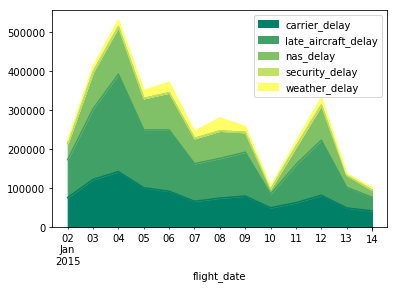

In [34]:
delays_by_day.plot(kind="area", colormap="summer")

In [35]:
flight_data.query("delayed==True")["unique_carrier"].value_counts()

WN    21150
EV    11371
OO    10804
AA     9841
DL     9803
UA     8624
MQ     8060
US     6353
B6     4401
NK     2133
AS     2104
F9     1848
HA     1354
VX      781
Name: unique_carrier, dtype: int64

In [36]:
delayed_by_carrier = flight_data.groupby(["unique_carrier", "delayed"]).size().unstack()
delayed_by_carrier["proportion_delayed"]=delayed_by_carrier[True] / ( delayed_by_carrier[True] + delayed_by_carrier[False])

In [37]:
delayed_by_carrier.sort_values(by="proportion_delayed", ascending=False).head()

delayed,False,True,proportion_delayed
unique_carrier,,,
MQ,4692,8060,0.632058
F9,1103,1848,0.626228
NK,1550,2133,0.579147
AA,8912,9841,0.524769
UA,7885,8624,0.522382


In [38]:
carrier_descriptions = flight_data.groupby("unique_carrier")["arr_delay"].describe()
carrier_descriptions.sort_values(by="mean", ascending=False)

,count,mean,std,min,25%,50%,75%,max
unique_carrier,,,,,,,,
MQ,11275.0,35.627406,58.444090,-51.0,-2.0,17.0,53.0,788.0
F9,2901.0,28.836953,62.164869,-41.0,-5.0,8.0,36.0,585.0
NK,3640.0,22.779670,51.725652,-42.0,-8.0,6.0,35.0,570.0
OO,19834.0,19.031663,51.351171,-52.0,-8.0,3.0,24.0,916.0
EV,21056.0,18.358520,50.653416,-43.0,-9.0,3.0,25.0,723.0
UA,16334.0,16.094772,50.124479,-62.0,-10.0,2.0,24.0,863.0
AA,18418.0,15.616299,53.717430,-69.0,-9.0,2.0,23.0,1444.0
B6,9149.0,13.576129,43.511926,-74.0,-11.0,0.0,20.0,502.0
WN,42020.0,11.273536,36.438970,-55.0,-9.0,1.0,19.0,535.0


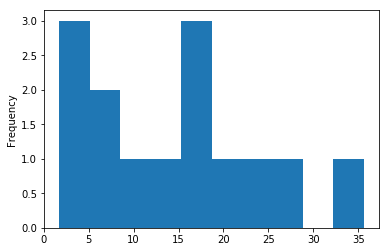

In [39]:
carrier_descriptions["mean"].plot(kind="hist")
plt.show()

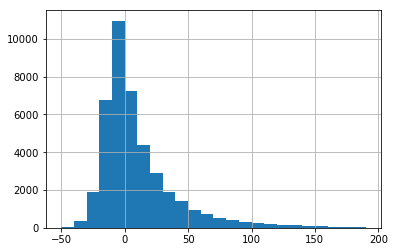

In [40]:
bin_values = np.arange(start=-50, stop=200, step=10)
flight_data.query("unique_carrier=='WN'")["arr_delay"].hist(bins=bin_values)

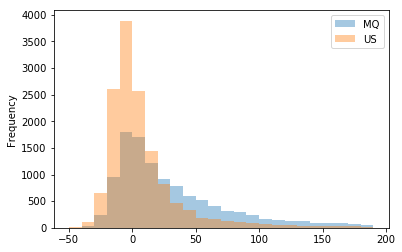

In [41]:
bin_values = np.arange(start=-50, stop=200, step=10)#
us_mq = flight_data.query("unique_carrier in ['US', 'MQ']")
us_mq_grouped = us_mq.groupby("unique_carrier")["arr_delay"]
us_mq_grouped.plot(kind="hist", bins=bin_values, alpha=.4, legend=True)
plt.show()

In [42]:
hi_volume = flight_data['origin'].value_counts()[:20]
hi_volume.head()

ATL    12678
ORD    10046
DFW     9854
DEN     7441
LAX     7434
Name: origin, dtype: int64

In [43]:
hi_volume_names = hi_volume.index.tolist()
hi_volume_airports = flight_data.query("origin in @hi_volume_names")
hi_volume_airports.head()

,flight_date,unique_carrier,flight_num,origin,dest,arr_delay,cancelled,distance,carrier_delay,weather_delay,late_aircraft_delay,nas_delay,security_delay,actual_elapsed_time,delayed
0,2015-01-02,AA,1.0,JFK,LAX,-19.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,381.0,False
1,2015-01-03,AA,1.0,JFK,LAX,-39.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,358.0,False
2,2015-01-04,AA,1.0,JFK,LAX,-12.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,385.0,False
3,2015-01-05,AA,1.0,JFK,LAX,-8.0,0.0,2475.0,NaN,NaN,NaN,NaN,NaN,389.0,False
4,2015-01-06,AA,1.0,JFK,LAX,25.0,0.0,2475.0,0.0,0.0,0.0,25.0,0.0,424.0,True


In [44]:
hi_volume_airports = hi_volume_airports.pivot_table(index = "flight_date", columns="origin", values="arr_delay", aggfunc=np.mean)

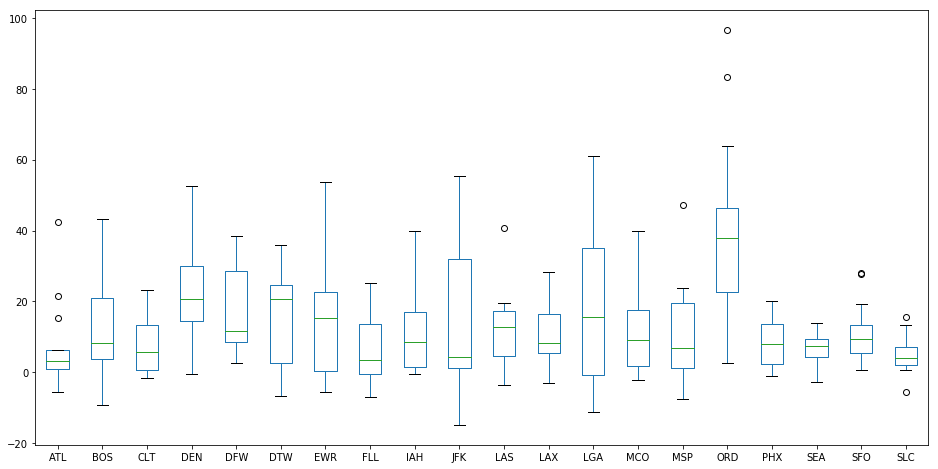

In [45]:
hi_volume_airports.plot(kind="box", figsize=(16, 8))
plt.show()

In [46]:
flight_data.groupby("unique_carrier")["arr_delay"].skew()

unique_carrier
AA     8.880971
AS     4.279389
B6     2.761009
DL     8.680340
EV     3.554270
F9     3.401014
HA    11.994636
MQ     2.655850
NK     3.209621
OO     3.716045
UA     3.967724
US     4.000744
VX     3.822005
WN     3.213101
Name: arr_delay, dtype: float64

# Ebola Data

In [47]:
import glob

In [48]:
csv_files_guinea = glob.glob("hw1/Data/ebola/guinea_data/*.*")

len(csv_files_guinea)

22

In [49]:
frame_guinea = pd.DataFrame()
for csv_file in csv_files_guinea:
    frame_guinea = frame_guinea.append(pd.read_csv(csv_file))

In [50]:
frame_guinea["Date"] = pd.to_datetime(frame_guinea["Date"])

In [51]:
frame_guinea = frame_guinea.fillna(0)
frame_guinea.head()

,Beyla,Boffa,Conakry,Coyah,Dabola,Dalaba,Date,Description,Dinguiraye,Dubreka,...,Kouroussa,Lola,Macenta,Mzerekore,Nzerekore,Pita,Siguiri,Telimele,Totals,Yomou
0,0,0,5,0,0,0,2014-08-04,New cases of suspects,0,0,...,0,0,0,0,0,0,0,0,5,0
1,0,0,0,0,0,0,2014-08-04,New cases of probables,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,2014-08-04,New cases of confirmed,0,0,...,0,0,0,0,0,0,0,0,4,0
3,0,0,6,0,0,0,2014-08-04,Total new cases registered so far,0,0,...,0,0,0,0,0,0,0,0,9,0
4,0,0,9,0,0,0,2014-08-04,Total cases of suspects,0,0,...,0,0,0,0,0,0,0,0,11,0


In [52]:
death_descriptions = ['Total deaths (confirmed + probables + suspects)']

guinea_selection = frame_guinea.query("Description in @death_descriptions")

guinea_selection = guinea_selection.set_index(["Date", "Description"])
guinea_selection.head(2)

,,Beyla,Boffa,Conakry,Coyah,Dabola,Dalaba,Dinguiraye,Dubreka,Forecariah,Gueckedou,...,Kouroussa,Lola,Macenta,Mzerekore,Nzerekore,Pita,Siguiri,Telimele,Totals,Yomou
Date,Description,,,,,,,,,,,,,,,,,,,,,
2014-08-04,Total deaths (confirmed + probables + suspects),0,16,42,0,4,0,1,0,0,247,...,3,0,29,0,1,2,3,10,363,0
2014-08-26,Total deaths (confirmed + probables + suspects),0,34,243,0,5,0,1,3,0,459,...,5,0,128,12,0,10,10,28,958,7


In [53]:
guinea_selection = guinea_selection.apply(pd.to_numeric)

In [54]:
guinea_selection = guinea_selection.sum(axis=1)
guinea_selection.head()

Date        Description                                    
2014-08-04  Total deaths (confirmed + probables + suspects)     726.0
2014-08-26  Total deaths (confirmed + probables + suspects)    1916.0
2014-08-27  Total deaths (confirmed + probables + suspects)     840.0
2014-08-30  Total deaths (confirmed + probables + suspects)     936.0
2014-08-31  Total deaths (confirmed + probables + suspects)     978.0
dtype: float64

In [55]:
type(guinea_selection)

pandas.core.series.Series

In [56]:
guinea_reset = guinea_selection.reset_index()

In [57]:
type(guinea_reset)

pandas.core.frame.DataFrame

In [58]:
guinea_reset.head()

,Date,Description,0
0,2014-08-04,Total deaths (confirmed + probables + suspects),726.0
1,2014-08-26,Total deaths (confirmed + probables + suspects),1916.0
2,2014-08-27,Total deaths (confirmed + probables + suspects),840.0
3,2014-08-30,Total deaths (confirmed + probables + suspects),936.0
4,2014-08-31,Total deaths (confirmed + probables + suspects),978.0


In [59]:
grouped = guinea_reset.groupby([guinea_reset["Date"].dt.month, "Description"]).agg(sum)
grouped

,,0
Date,Description,
8,Total deaths (confirmed + probables + suspects),5396.0
9,Total deaths (confirmed + probables + suspects),19301.0
10,Total deaths (confirmed + probables + suspects),1475.0


In [60]:
guinea_selection.groupby(lambda x: (x[0].month, x[1])).agg(sum)

(8, Total deaths (confirmed + probables + suspects))      5396.0
(9, Total deaths (confirmed + probables + suspects))     19301.0
(10, Total deaths (confirmed + probables + suspects))     1475.0
dtype: float64

In [61]:
guinea_reset.pivot_table(index=[guinea_reset.Date.dt.month, "Description"], aggfunc=np.sum)

,,0
Date,Description,
8,Total deaths (confirmed + probables + suspects),5396.0
9,Total deaths (confirmed + probables + suspects),19301.0
10,Total deaths (confirmed + probables + suspects),1475.0


# Titanic Data

In [62]:
titanic_frame = pd.read_excel("hw1/Data/titanic.xls")

In [63]:
titanic_frame.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


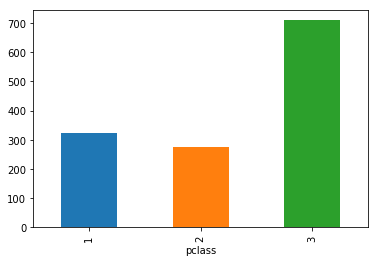

In [64]:
titanic_frame.groupby("pclass").size().plot(kind="bar")
plt.show()

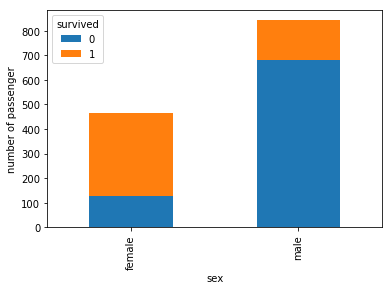

In [65]:
titanic_frame.groupby(["sex", "survived"]).size().unstack().plot(kind="bar", stacked=True)
plt.ylabel("number of passenger")
plt.show()

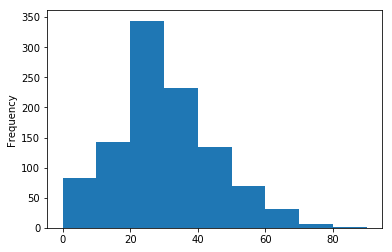

In [66]:
titanic_frame["age"].plot(kind="hist", bins=np.arange(0, 100, 10))
plt.show()

In [67]:
counts, bins = np.histogram(titanic_frame.query("age > 0")["age"], bins=np.arange(0, 100, 10))

In [68]:
ages = titanic_frame["age"]
ages = ages[ages>=0]

binned_ages = pd.cut(ages, np.arange(0, 100, 10))
binned_counts = binned_ages.groupby(binned_ages).size()

In [69]:
binned_counts

age
(0, 10]      86
(10, 20]    162
(20, 30]    361
(30, 40]    210
(40, 50]    132
(50, 60]     62
(60, 70]     27
(70, 80]      6
(80, 90]      0
Name: age, dtype: int64

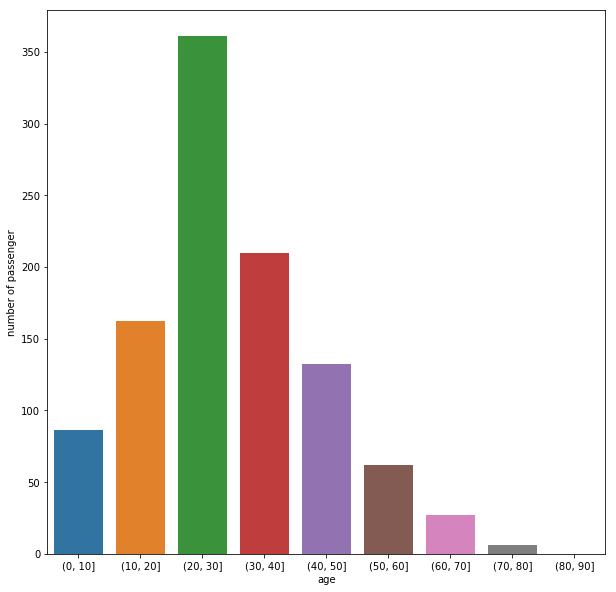

In [70]:
plt.figure(figsize=(10,10))
sns.barplot(binned_counts.index, binned_counts.values)
plt.xlabel("age")
plt.ylabel("number of passenger")
plt.show()

In [71]:
titanic_frame["cabin_letter"] = titanic_frame["cabin"].apply(lambda x : str(x)[0])

In [72]:
titanic_frame["cabin_letter"].unique()

array(['B', 'C', 'E', 'D', 'A', 'n', 'T', 'F', 'G'], dtype=object)

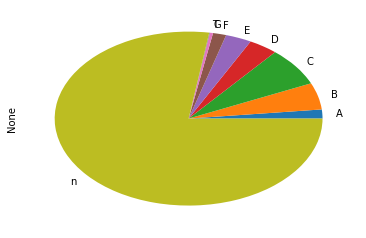

In [73]:
titanic_frame.groupby("cabin_letter").size().plot(kind="pie")
plt.show()

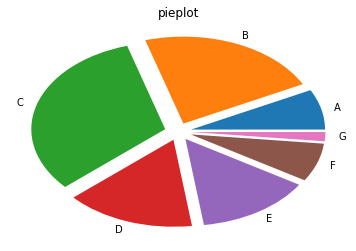

In [74]:
titanic_frame.query("cabin_letter not in ['n', 'T']").groupby("cabin_letter").size().plot.pie(explode=(0.1,)*7)
plt.title("pieplot")
plt.ylabel("")
plt.show()

# BeautifulSoup

In [75]:
import requests
from bs4 import BeautifulSoup
import bs4

In [76]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
page

<Response [200]>

In [77]:
soup = BeautifulSoup(page.content, "html.parser")

In [78]:
list(soup.descendants)

['html', '\n', <html>
 <head>
 <title>A simple example page</title>
 </head>
 <body>
 <p>Here is some simple content for this page.</p>
 </body>
 </html>, '\n', <head>
 <title>A simple example page</title>
 </head>, '\n', <title>A simple example page</title>, 'A simple example page', '\n', '\n', <body>
 <p>Here is some simple content for this page.</p>
 </body>, '\n', <p>Here is some simple content for this page.</p>, 'Here is some simple content for this page.', '\n', '\n']

In [79]:
list(soup.children)[2].children

In [80]:
soup.find_all("p")

[<p>Here is some simple content for this page.</p>]

In [81]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
soup = BeautifulSoup(page.content, 'html.parser')

In [82]:
soup.find_all("p", class_="outer-text")

[<p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>, <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

In [83]:
soup.find_all(id="first")

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>]

In [84]:
soup.select("div p")

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>, <p class="inner-text">
                 Second paragraph.
             </p>]

In [85]:
page = requests.get("http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
page

<Response [200]>

In [86]:
soup = BeautifulSoup(page.content, 'html.parser')

In [87]:
soup.find(id="current_conditions-summary")

<div class="pull-left" id="current_conditions-summary">
<p class="myforecast-current">NA</p>
<p class="myforecast-current-lrg">55°F</p>
<p class="myforecast-current-sm">13°C</p>
</div>

In [88]:
soup.find_all(class_="myforecast-current-sm")

[<p class="myforecast-current-sm">13°C</p>]

In [89]:
soup.find_all(class_="myforecast-current-sm")[0].text

'13°C'

In [90]:
soup.select("body div p.myforecast-current-sm")

[<p class="myforecast-current-sm">13°C</p>]

In [91]:
soup.select("body div p.myforecast-current-sm")[0]["class"]

['myforecast-current-sm']

# University data

In [92]:
import json
r_times_ranking = requests.get('https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json')
data_times_200_first = r_times_ranking.json()['data'][:200]

# this is how an entry looks
data_times_200_first[1]

{'aliases': 'University of Cambridge',
 'location': 'United Kingdom',
 'member_level': '0',
 'name': 'University of Cambridge',
 'nid': 470,
 'rank': '2',
 'rank_order': '20',
 'record_type': 'master_account',
 'scores_citations': '97.5',
 'scores_citations_rank': '29',
 'scores_industry_income': '51.5',
 'scores_industry_income_rank': '260',
 'scores_international_outlook': '93.0',
 'scores_international_outlook_rank': '35',
 'scores_overall': '93.2',
 'scores_overall_rank': '20',
 'scores_research': '97.8',
 'scores_research_rank': '3',
 'scores_teaching': '87.8',
 'scores_teaching_rank': '3',
 'stats_female_male_ratio': '45 : 55',
 'stats_number_students': '18,389',
 'stats_pc_intl_students': '35%',
 'stats_student_staff_ratio': '10.9',
 'subjects_offered': 'Biological Sciences,Physics & Astronomy,Civil Engineering,Chemistry,General Engineering,Geology, Environmental, Earth & Marine Sciences,Psychology,Computer Science,Sociology,Mathematics & Statistics,Geography,Economics & Econome

In [93]:
times_dataframe = pd.DataFrame.from_dict(data_times_200_first)

In [94]:
times_dataframe.columns

Index(['aliases', 'location', 'member_level', 'name', 'nid', 'rank',
       'rank_order', 'record_type', 'scores_citations',
       'scores_citations_rank', 'scores_industry_income',
       'scores_industry_income_rank', 'scores_international_outlook',
       'scores_international_outlook_rank', 'scores_overall',
       'scores_overall_rank', 'scores_research', 'scores_research_rank',
       'scores_teaching', 'scores_teaching_rank', 'stats_female_male_ratio',
       'stats_number_students', 'stats_pc_intl_students',
       'stats_student_staff_ratio', 'subjects_offered', 'url'],
      dtype='object')

In [95]:
times_dataframe.head(2)

,aliases,location,member_level,name,nid,rank,rank_order,record_type,scores_citations,scores_citations_rank,...,scores_research,scores_research_rank,scores_teaching,scores_teaching_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,subjects_offered,url
0,University of Oxford,United Kingdom,0,University of Oxford,468,1,10,master_account,99.1,15,...,99.5,1,86.7,5,46 : 54,"20,409",38%,11.2,Politics & International Studies (incl Develop...,/world-university-rankings/university-oxford
1,University of Cambridge,United Kingdom,0,University of Cambridge,470,2,20,master_account,97.5,29,...,97.8,3,87.8,3,45 : 55,"18,389",35%,10.9,"Biological Sciences,Physics & Astronomy,Civil ...",/world-university-rankings/university-cambridge


In [96]:
location_region_mapping={
    "United Kingdom" : "UK",
    "United States": "US"
}

In [97]:
times_dataframe["region"]=times_dataframe["location"].map(location_region_mapping)

In [98]:
times_dataframe[times_dataframe["aliases"].str.contains("RWTH")]

,aliases,location,member_level,name,nid,rank,rank_order,record_type,scores_citations,scores_citations_rank,...,scores_research_rank,scores_teaching,scores_teaching_rank,stats_female_male_ratio,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,subjects_offered,url,region
78,RWTH Aachen University,Germany,0,RWTH Aachen University,632,79,790,master_account,72.8,293,...,68,53.4,78,32 : 68,"43,721",18%,57.7,"Business & Management,Politics & International...",/world-university-rankings/rwth-aachen-university,NaN


In [99]:
times_numeric=times_dataframe.copy()
times_numeric["stats_student_staff_ratio"]=times_numeric["stats_student_staff_ratio"].apply(pd.to_numeric)

In [100]:
times_numeric.pivot_table(index="location", values="stats_student_staff_ratio")

,stats_student_staff_ratio
location,
Australia,27.462500
Austria,20.800000
Belgium,38.550000
Canada,19.716667
China,11.942857
Denmark,8.133333
Finland,18.200000
France,13.450000
Germany,44.025000


# Lalonde Data

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
import networkx as nx
from networkx.algorithms import bipartite

import seaborn as sns

%matplotlib inline

In [102]:
lalonde = pd.read_csv('hw4/lalonde.csv')
lalonde.head(2)

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.046
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.894


In [103]:
lalonde.set_index("id", inplace=True)

In [104]:
lalonde["race"] = 2 - 2*lalonde.black - lalonde.hispan
lalonde = lalonde.drop(["black", "hispan"], axis=1)

In [105]:
logistic = linear_model.LogisticRegression()
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# We won't include re78 since this is the salary after the subject is treated
features = ["age", "educ", "race", "married", "nodegree", "re74", "re75"]
X = scaler.fit_transform(lalonde[features])
#X = (lalonde[features] - lalonde[features].mean(axis=0))/lalonde[features].std(axis=0)
y = lalonde.treat

logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
propensities = logistic.predict_proba(X)[:, 1]

In [107]:
lalonde_copy = lalonde.copy()
lalonde_copy["propensity"]=propensities
data_treat = lalonde_copy.query("treat == 1")
data_notreat = lalonde_copy.query("treat == 0")

In [108]:
G = nx.Graph()

G.add_nodes_from(data_treat.index.values, bipartite=0)
G.add_nodes_from(data_notreat.index.values, bipartite=1)

for i, row_i in data_treat.iterrows():
    for j, row_j in data_notreat.iterrows():
        propensity_i = row_i["propensity"]
        propensity_j = row_j["propensity"]
        G.add_edge(i, j, weight = -abs(propensity_i - propensity_j))

In [109]:
matching_propensity = nx.max_weight_matching(G, maxcardinality = True)

In [110]:
matchings = []
for key, val in matching_propensity.items(): 
    propensity_i = lalonde_copy.loc[key, "propensity"]
    propensity_j = lalonde_copy.loc[val, "propensity"]
    diff = abs(propensity_i - propensity_j)
    
    if "NSW" in key:
        matchings.append((key, val, diff))

In [111]:
good_matchings = [m for m in matchings if m[2] < 0.05]

In [112]:
treat_indices = [m[0] for m in good_matchings]
notreat_indices = [m[1] for m in good_matchings]

lalonde_matched = lalonde_copy.loc[treat_indices + notreat_indices]

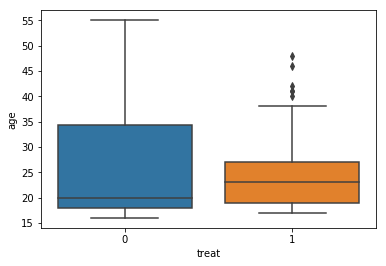

In [113]:
sns.boxplot(x="treat", y="age", data=lalonde_matched)
plt.show()

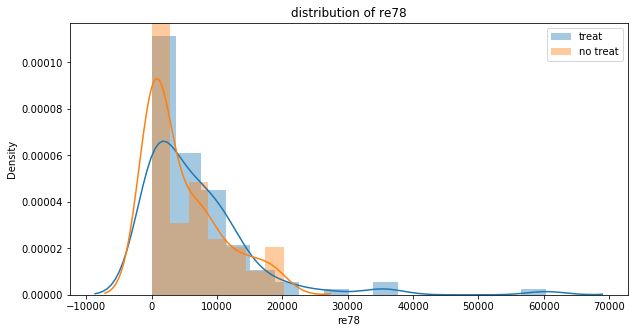

In [114]:
plt.figure(figsize=(10,5))
plt.title("distribution of re78")
sns.distplot(lalonde_copy.loc[treat_indices]["re78"], label="treat")
sns.distplot(lalonde_copy.loc[notreat_indices]["re78"], label="no treat")
plt.legend(loc="upper right")
plt.ylabel("Density")
plt.show()

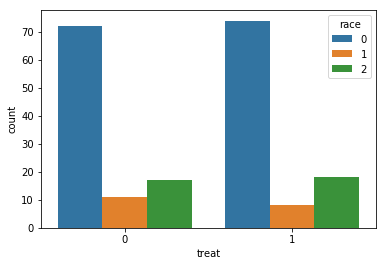

In [115]:
plt.figure()
sns.countplot(x="treat", hue="race", data=lalonde_matched)
plt.show()

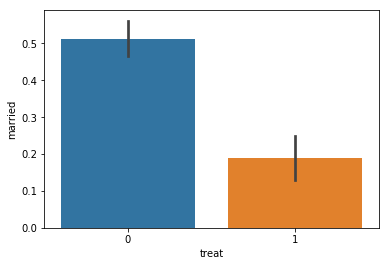

In [116]:
sns.barplot(x="treat", y="married", data=lalonde)
plt.show()

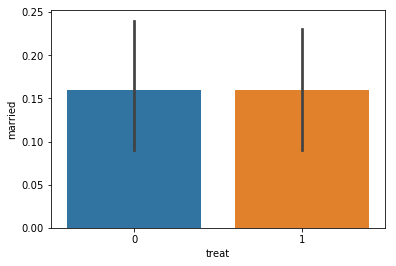

In [117]:
sns.barplot(x="treat", y="married", data=lalonde_matched)
plt.show()

# SKlearn news data

In [118]:
# we use the builtin function for loading data
# sklearn already has a split in train/test, you can specify which data you want with the "subset" parameter
# since we will perform that split ourselves, we load all data
# we do not remove any metadata, this leads to much worse classification results

from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset="all")

In [119]:
newsgroups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])

In [120]:
newsgroups.data[0]

"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

# this will create a vector for every article
# the output is a matrix
# please note that we use a specific parametrization for the vectorizer:
# we exclude words that are too frequent, they are not specific enough to identify correlations with categories
# we also apply a smoothing operation
matrix = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english').fit_transform(newsgroups.data)

print(type(matrix))
print(matrix.shape)

<class 'scipy.sparse.csr.csr_matrix'>
(18846, 173446)


In [122]:
# renaming
X = matrix
y = newsgroups.target

# now we do the split into train, test, val
# it's 0.8, 0.1, 0.1

num_samples = len(y)
num_train = int(0.8 * num_samples)
num_test = int(0.1 * num_samples)
num_val = int(0.1 * num_samples)

X_train = X[:num_train]
X_test = X[num_train : -num_val]
X_val = X[-num_val:]


y_train = y[:num_train]
y_test = y[num_train : -num_val]
y_val = y[-num_val:]

In [123]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [124]:
# use the classifier to predict labels for the test set
random_forest.score(X_test, y_test)

0.73700954400848351

In [125]:
n_estimators = np.arange(10) + 5
max_depths = 7 * np.logspace(1, 2, num=5, dtype=np.int)

print("num estimators: ", n_estimators)
print("max depths: ", max_depths)

# we will use multithreading to process the grid on multiple cpus
# the load balancing of sklearn is not very complex
# it just splits the list and then collects the results
# but the parametrizations for more estimators / depths take much longer
# so we shuffle, as a simple load balancing
np.random.shuffle(n_estimators)
np.random.shuffle(max_depths)

num estimators:  [ 5  6  7  8  9 10 11 12 13 14]
max depths:  [ 70 119 217 392 700]


In [126]:
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from scipy.sparse import vstack

In [127]:
train_indices = [-1] * X_train.shape[0]
test_indices = [0] * X_test.shape[0]
indices = train_indices + test_indices

X_joint = vstack([X_train, X_test])
y_joint = np.concatenate([y_train, y_test])

pds = PredefinedSplit(indices)

In [129]:
import pickle
rerun = True

if rerun:
    
    rfc = RandomForestClassifier()
    clf_grid1 = GridSearchCV(rfc, param_grid={'n_estimators':n_estimators, 'max_depth':max_depths}, cv=pds, n_jobs=-1)
    clf_grid1.fit(X_joint, y_joint)
    
    with open("data/clf_grid.pickle", "wb") as file:
        pickle.dump(clf_grid1, file)
else:
    with open("data/clf_grid.pickle", "rb") as file:
        clf_grid1 = pickle.load(file)

FileNotFoundError: [Errno 2] No such file or directory: 'data/clf_grid.pickle'

In [131]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(clf_grid1.predict(X_val), y_val)

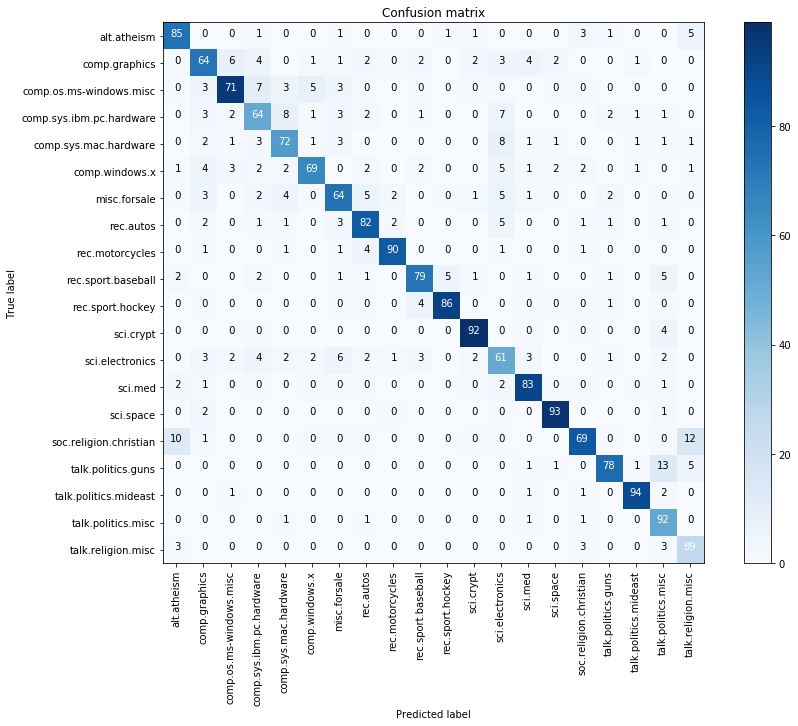

In [132]:
plt.figure(figsize=(13,10))

# plot the background colors
plt.title("Confusion matrix")
plt.imshow(cm, interpolation="None", cmap=plt.cm.Blues)
plt.colorbar()

# plot the category names
target_names = newsgroups.target_names
name_anchors = np.arange(len(target_names))
plt.xticks(name_anchors, target_names, rotation=90)
plt.yticks(name_anchors, target_names)

# normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# plot the confusion percentages, as text
# we need to change the text color based on the background color
# if the background is above a threshold, we use white as text color
thresh = cm.max() / 2.
for i in range(len(target_names)):
    for j in range(len(target_names)): 
        plt.text(j, i, "{:2d}".format(int(cm[i, j]*100)),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()